### Import Libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

### Read Dataset

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


### See Relationship between data points 

Text(0, 0.5, 'Height')

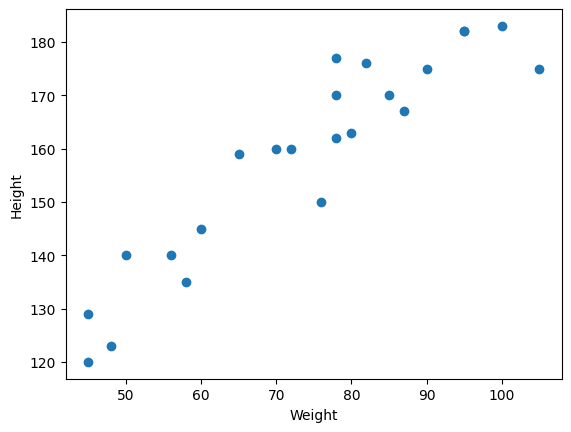

In [4]:
plt.scatter(df['Weight'] , df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

### Finding Correlation between data points

In [5]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


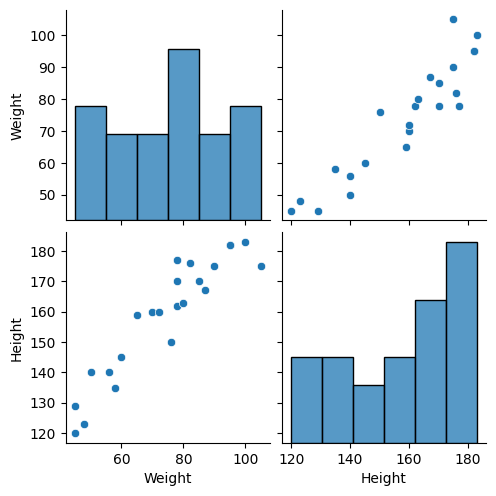

In [6]:
sb.pairplot(df)

### Conclusion : Data Points are Linearly correlated 

### Divide features as independent and dependent .

In [7]:
## Independent Feature 
indp_feature = df[['Weight']]
dep_feature = df['Height']
# indp_feature.head()
# type(indp_feature)
# indp_feature.shape
dep_feature.shape

(23,)

### Split Dataset 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
indep_train , indep_test , dep_train , dep_test = train_test_split(indp_feature , dep_feature , test_size=0.25 , random_state=42)

In [10]:
indep_train.shape

(17, 1)

### `Standardization`

In [11]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
indep_train = scaler.fit_transform(indep_train)
print(indep_train)

In [13]:
indep_test = scaler.transform(indep_test)
print(indep_test)

[[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


### Apply Linear Regression 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regression = LinearRegression(n_jobs=-1)

### `Fit` the model

In [16]:
regression.fit(indep_train , dep_train)

LinearRegression(n_jobs=-1)

### Get Coefficient 

In [17]:
regression.coef_

array([17.2982057])

### Get Intercept 

In [18]:
regression.intercept_

np.float64(156.47058823529412)

### Conclusion : One unit moment in weight value leads to 17.29 moment in height value 

### `Prediction for Train Data` and plotting the best fit line for the same (train data) 

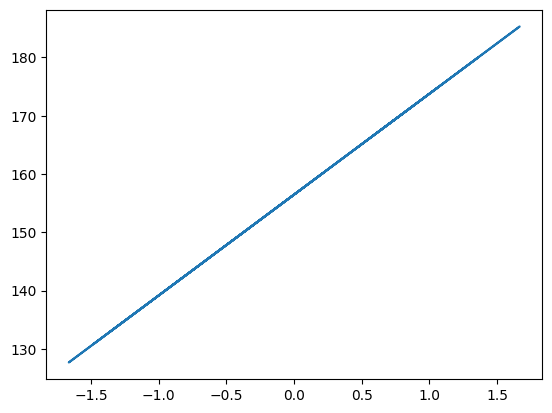

In [29]:
# plt.scatter(indep_train , dep_train)
plt.plot(indep_train , regression.predict(indep_train))

### `Prediction for Test Data`. Test Data is already transformed.
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [20]:
Y_pred = regression.predict(indep_test)
print("Predicted value is " , Y_pred)

Predicted value is  [162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


### Performance Metrics

In [21]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [22]:
mse = mean_squared_error(dep_test, Y_pred)
mae = mean_absolute_error(dep_test , Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [23]:
from sklearn.metrics import r2_score

In [24]:
score = r2_score(dep_test , Y_pred)
print(score)

0.7360826717981276


## Same Problem Using OLS

In [39]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 12.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.6 MB 15.0 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 11.0 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 8.7 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 8.0 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 6.7 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 5.8 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 5.2 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 4.8 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 4.4 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 4.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import statsmodels.api as sm

In [26]:
model = sm.OLS(dep_train , indep_train).fit()

In [27]:
prediction = model.predict(indep_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [28]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 10 Jul 2025   Prob (F-statistic):                       0.664
Time:                        11:31:24   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Prediction for New Data

### `NOTE` - First Standardize it 

In [44]:
regression.predict(scaler.transform([[72]]))

c:\Users\shach\OneDrive\Desktop\MyPyProgs\MLOPs Course\mlcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])